# Amazon Sales Analysis (2019)



In [1]:
# required imports
import os
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# the path
path = './data/Sales_Data'

### 1: Merge data from each month into one CSV (step-by-step)

In [2]:
# 1.1 read the data files (names)
January_sales = pd.read_csv("..\data\Sales_Data\Sales_January_2019.csv")
February_sales = pd.read_csv("..\data\Sales_Data\Sales_February_2019.csv")
March_sales = pd.read_csv("..\data\Sales_Data\Sales_March_2019.csv")
April_sales = pd.read_csv("..\data\Sales_Data\Sales_April_2019.csv")
May_sales = pd.read_csv("..\data\Sales_Data\Sales_May_2019.csv")
June_sales = pd.read_csv("..\data\Sales_Data\Sales_June_2019.csv")
July_sales = pd.read_csv("..\data\Sales_Data\Sales_July_2019.csv")
August_sales = pd.read_csv("..\data\Sales_Data\Sales_August_2019.csv")
September_sales = pd.read_csv("..\data\Sales_Data\Sales_September_2019.csv")
October_sales = pd.read_csv("..\data\Sales_Data\Sales_October_2019.csv")
November_sales = pd.read_csv("..\data\Sales_Data\Sales_November_2019.csv")
December_sales = pd.read_csv("..\data\Sales_Data\Sales_December_2019.csv")

In [3]:
# 1.2 concat data from all files into one file `data/all_data.csv`
all_data = pd.concat([January_sales, February_sales, March_sales, April_sales, May_sales, June_sales, 
                     July_sales, August_sales, September_sales, October_sales, November_sales,
                      December_sales
                     ])
path = "..\data"

all_data.to_csv(os.path.join(path, r"all_data.csv"))

In [4]:
# 1.3 read the updated dataframe
all_data_2019 = pd.read_csv("../data/all_data.csv")
all_data_2019.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


###  2: Clean up the data!

In [5]:
# 2.1 Drop rows of NAN

nan_df = all_data_2019[all_data_2019.isna().any(axis=1)]
display(nan_df.head())

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,664,NaN,NaN,NaN,NaN,NaN,NaN
678,678,NaN,NaN,NaN,NaN,NaN,NaN
797,797,NaN,NaN,NaN,NaN,NaN,NaN
876,876,NaN,NaN,NaN,NaN,NaN,NaN
1299,1299,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data_2019=all_data_2019.dropna()

all_data_2019

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
186845,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [7]:
text_2019 = all_data_2019[all_data_2019["Order Date"] == 'Order Date']

text_2019

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...,...
184931,23198,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185070,23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185481,23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# 2.2 Get rid of text in order date column

all_data_2019 = all_data_2019[all_data_2019["Order Date"] != "Order Date"]
all_data_2019

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...
186845,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [9]:
# 2.3 Make columns correct type
all_data_2019["Quantity Ordered"] = pd.to_numeric(all_data_2019["Quantity Ordered"])
all_data_2019["Price Each"] = pd.to_numeric(all_data_2019["Price Each"])

### 3: Augment data with additional columns

In [10]:
# 3.1 Add month column
all_data_2019["Month"] = all_data_2019["Order Date"].str[0:2]

all_data_2019.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [11]:
all_data_2019["Month"] = pd.to_numeric(all_data_2019["Month"])

all_data_2019

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...,...
186845,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
186846,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
186847,25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
186848,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [12]:
all_data_2019["City"] = all_data_2019["Purchase Address"].apply(lambda x:x.split(",")[1])
all_data_2019

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin
...,...,...,...,...,...,...,...,...,...
186845,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco
186846,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles
186847,25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,Seattle
186848,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,Dallas


In [13]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data_2019['City'] = all_data_2019['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data_2019.tail()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
186845,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco (CA)
186846,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles (CA)
186847,25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,Seattle (WA)
186848,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,Dallas (TX)
186849,25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001",12,Los Angeles (CA)


###  4: Data Exploration!

#### 4.1: What was the best month for sales? How much was earned that month? 

In [14]:
all_data_2019["Sales"] = all_data_2019["Quantity Ordered"] * all_data_2019["Price Each"]
all_data_2019

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA),700.00
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR),14.95
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),23.98
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),149.99
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX),11.99
...,...,...,...,...,...,...,...,...,...,...
186845,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco (CA),14.95
186846,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles (CA),7.68
186847,25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,Seattle (WA),400.00
186848,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,Dallas (TX),11.99


In [15]:
all_data_2019.groupby(['Month']).sum()



,Unnamed: 0,Quantity Ordered,Price Each,Sales
Month,,,,
1,47433245,10903,1.811768e+06,1.822257e+06
2,72123197,13449,2.188885e+06,2.202022e+06
3,115333587,17005,2.791208e+06,2.807100e+06
4,167977608,20558,3.367671e+06,3.390670e+06
5,137829259,18667,3.135125e+06,3.152607e+06
6,92330356,15253,2.562026e+06,2.577802e+06
7,102752005,16072,2.632540e+06,2.647776e+06
8,71824951,13448,2.230345e+06,2.244468e+06
9,67863032,13109,2.084992e+06,2.097560e+06


range(1, 13)


<ipython-input-16-a2a4d7b51d5e>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(months,all_data_2019.groupby(['Month']).sum()['Sales'], color=my_colours)


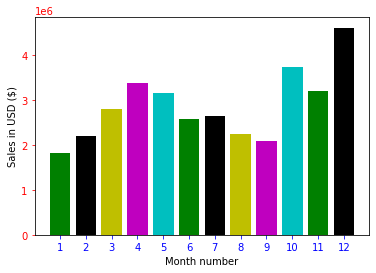

In [16]:
months = range(1,13)
my_colours = "gkymc"
print(months)
plt.bar(months,all_data_2019.groupby(['Month']).sum()['Sales'], color=my_colours)
plt.xticks(months)
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


####  4.2: What city sold the most product?

In [19]:
# 4.2
city_sales=all_data_2019.groupby(['City']).sum()
city_sales

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta (GA),122928154,16602,2.779908e+06,104794,2.795499e+06
Austin (TX),82709457,11153,1.809874e+06,69829,1.819582e+06
Boston (MA),165758780,22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),124308328,16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),247743297,33289,5.421435e+06,208325,5.452571e+06
New York City (NY),208439450,27932,4.635371e+06,175741,4.664317e+06
Portland (ME),20641344,2750,4.471893e+05,17144,4.497583e+05
Portland (OR),83402354,11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),372569180,50239,8.211462e+06,315520,8.262204e+06


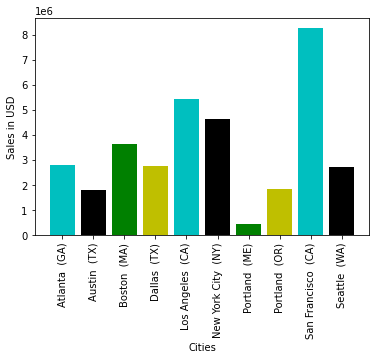

In [65]:
# 4.2 continued
cities = [city for city, df in all_data_2019.groupby("City")]


plt.bar(cities, city_sales['Sales'],  color=("c","k","g","y"))

plt.xticks(cities, rotation="vertical")
plt.ylabel("Sales in USD")
plt.xlabel("Cities")


plt.show()

####  4.3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [20]:
all_data_2019["Order Date"] = pd.to_datetime(all_data_2019["Order Date"])

all_data_2019.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),700.00
1,1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14.95
2,2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),23.98
3,3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),149.99
4,4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11.99


In [21]:
# 4.3.1 Add hour column
all_data_2019["Hour"] = all_data_2019["Order Date"].dt.hour

all_data_2019.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour
0,0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),700.00,21
1,1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14.95,14
2,2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),23.98,13
3,3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),149.99,20
4,4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11.99,11


In [22]:
all_data_2019["Minute"] = all_data_2019["Order Date"].dt.minute

all_data_2019.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute
0,0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),700.00,21,25
1,1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14.95,14,15
2,2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),23.98,13,33
3,3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),149.99,20,33
4,4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11.99,11,59


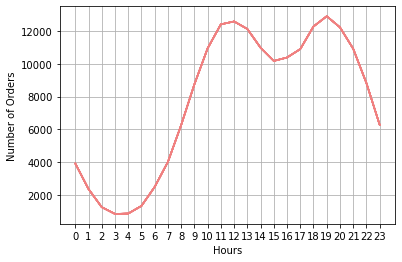

In [23]:
# 4.3.2 Results
hour_sales=all_data_2019.groupby(['Hour']).count()

Hours = [hour for hour, df in all_data_2019.groupby('Hour')]

plt.plot(Hours, hour_sales, color="lightcoral")
plt.xticks(Hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()


####  4.4: What products are most often sold together?

In [38]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby


In [33]:
Order_df = all_data_2019[all_data_2019["Order ID"].duplicated(keep=False)]

Order_df["Multiple Order"] = Order_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

Order_df2 = Order_df[["Order ID", "Multiple Order"]].drop_duplicates()

Order_df2.head()

,Order ID,Multiple Order
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [30]:
from itertools import combinations
from collections import Counter

In [ ]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

In [35]:
count = Counter()

for row in Order_df2["Multiple Order"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 3)))
    


for key,value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [38]:
count = Counter()

for row in Order_df2["Multiple Order"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    


for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [39]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary


### 5: Most Popular Product?

What product sold the most? Why do you think it sold the most?

In [48]:
# exercise 5
product_group = all_data_2019.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
product_group.sum()


,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,,
20in Monitor,34263700,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,52531482,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,62800951,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,51318688,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),170984790,27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),171339939,31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,129879472,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,111875345,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,39883719,4819,1440000.00,34224,1445700.00,68815,142789


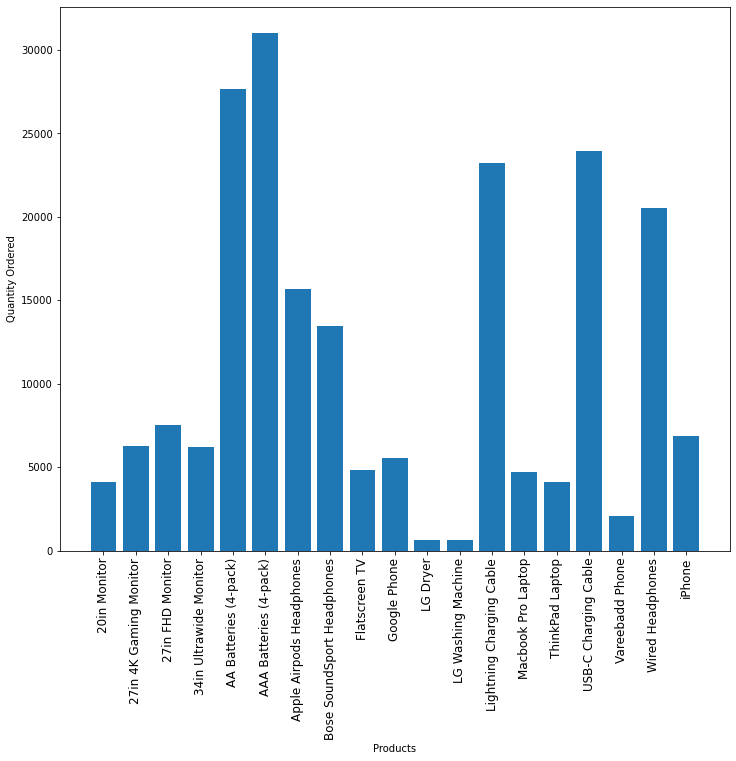

In [54]:
# exercise 5 continued
#
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
products = [product for product, prod in product_group]

plt.figure(figsize=(12,10))
plt.bar(products, quantity_ordered)
plt.xticks(rotation='vertical', size=12)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.show()

In [55]:
prices = all_data_2019.groupby("Product").mean()["Price Each"]

prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-77-fdfbcad0ec28>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


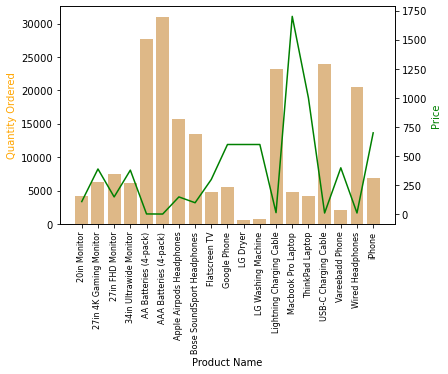

In [77]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color="burlywood")
ax2.plot(products, prices, color="g")
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color="orange")
ax2.set_ylabel("Price", color="g")

plt.show()

## Note

This activity was taken from https://github.com/KeithGalli/Pandas-Data-Science-Tasks. 

Once you have completed all, or as much as you can, of the activity, feel free to watch [Keith Galli's accompanying video](https://www.youtube.com/watch?v=eMOA1pPVUc4).